In [1]:
%matplotlib inline

In [2]:
import matplotlib
print(matplotlib.__version__)

3.8.4


# 学习更多图表和定制化

## 设置坐标轴标签的透明度和大小
Axes标签对于读者理解图表非常重要，它描述了图表中展现的数据内容。
通过向Axes添加标签，我们能够帮助读者更准确地理解图表所表达的信息。

在深入分析代码之前，十分有必要先了解一下matplotlib是如何组织图表的。 

最上层是一个Figure实例，包含了所有可见的和其他一些不可见的内容。该Figure实例包含了一个Axes实例字段 Figure.axes。
Axes实例几乎包含了我们所关心的所有东西，如所有的线、点、刻度和标签。因此，当调用plot()方法时，程序就会向Axes.lines列表添加一个线条的实例（matplotlib.lines.Line2D）。
如果绘制了一个直方图（通过调用hist()），程序就会向Axes.patches列表添加许多矩形 （“patches”是从MATLABTM继承来的一个术语，表示“颜色补片”的概念）。 

Axes实例也包含了XAxis和YAxis实例的引用，分别指向相应的x轴和y轴。XAxis和YAxis管理坐标轴、标签、刻度、刻度标签、定位器和格式器的绘制，我们可以通过Axes.xaxis和Axes.yaxis分别引用它们。
其实不必按照前面所说的方式通过XAxis或YAxis实例得到标签对象，因为matplotlib提供了helper方法（实际上是一个捷径）来迭代这些标签，它们是matplotlib.pyplot.xlabel()和 matplotlib.pyplot.ylabel()。

我们现在将要创建一个新的图形，然后在其上进行如下操作。

1. 创建一个包含一些随机生成的数据的图表。
2. 添加title和Axes标签。
3. 添加alpha设置。
4. 向title和Axes标签添加阴影效果。

操作步骤的代码如下。

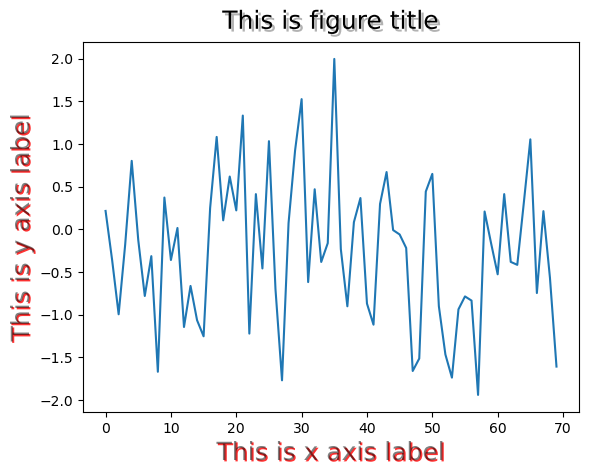

In [2]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
data = np.random.randn(70)

fontsize = 18
plt.plot(data)

title = "This is figure title"
x_label = "This is x axis label"
y_label = "This is y axis label"

title_text_obj = plt.title(title, fontsize=fontsize, verticalalignment='bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angle' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparency of the shadow

offset_xy = (1, -1)
rgbRed = (1.0,0.0,0.0)
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(offset = offset_xy,
    shadow_rgbFace = rgbRed,
    alpha = alpha)
# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

## 为图表线条添加阴影

为了区分图表中的某一线条，或者仅仅为了保持包含图表在内的所有表格的总体风格一致，有时需要为图表线条（或者直方图）添加阴影效果。

为了向图表中的线条或者矩形条添加阴影，我们需要使用matplotlib内置的transformation框架，它位于
matplotlib.transforms模块中。

为了理解所有这些是如何工作的，我们需要解释下matplotlib中的transformation框架以及它们的工作原理。

transformation知道如何将给定的坐标从其坐标系转换到显示坐标系中，它们也知道如何将坐标从显示坐标系转换成它们自己的坐标系。

下面是向图表添加阴影效果的代码。

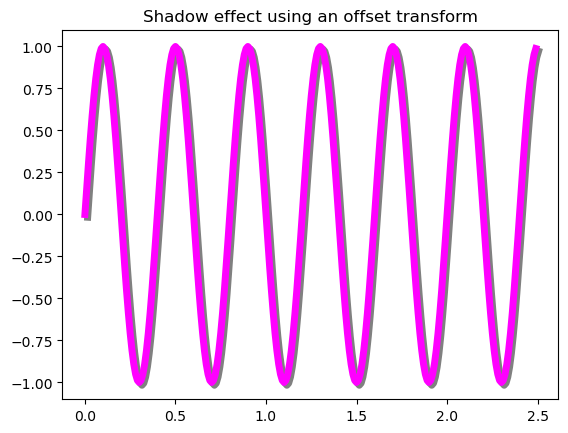

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

def setup(layout=None):
    assert layout is not None
    fig = plt.figure()
    ax = fig.add_subplot(layout)
    return fig, ax
    
def get_signal():
    t = np.arange(0., 2.5, 0.01)
    s = np.sin(5 * np.pi * t)
    return t, s

def plot_signal(t, s):
    line, = axes.plot(t, s, linewidth=5, color='magenta')
    return line
    
def make_shadow(fig, axes, line, t, s):
    delta = 2 / 72. # how many points to move the shadow
    offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
    offset_transform = axes.transData + offset

    # We plot the same data, but now using offset transform
    # zorder -- to render it below the line
    axes.plot(t, s, linewidth=5, color='gray',
                transform=offset_transform,
                zorder=0.5 * line.get_zorder())

if __name__ == "__main__":
    fig, axes = setup(111)
    t, s = get_signal()
    line = plot_signal(t, s)
    make_shadow(fig, axes, line, t, s)
    axes.set_title('Shadow effect using an offset transform')
    plt.show()

## 向图表添加数据表

首先，重要的是要理解为什么要向图表添加表格。为数据绘制可视化图形的主要目的是解释那些不能理解（或者很难理解）的数据值。
现在，我们想把数据添加回来。仅仅在图表下面生硬地添加一张大表格显然是不明智的做法。

然而，通过精心挑选的、或者来自数据整体集合的总结性的或者突出强调的值，我们可以识别出图表的重要部分，
并在一些地方强调一些非常重要的值。在这些地方，这些精确的值（例如以USD为单位的年销售额）是非常重要的（或者是必需的）。

这段代码向图表添加了一个示例表格。

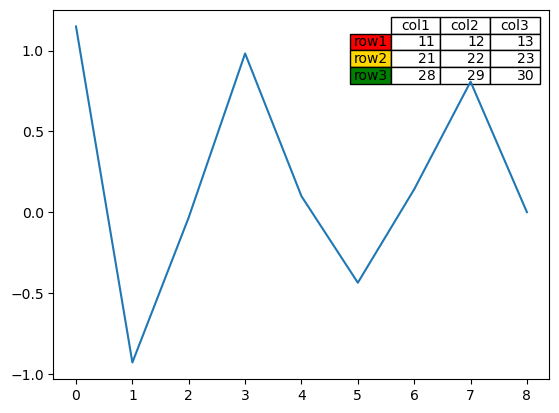

In [5]:
import matplotlib.pylab as plt
import numpy as np

plt.figure()
ax = plt.gca()
y = np.random.randn(9)

col_labels = ['col1','col2','col3']
row_labels = ['row1','row2','row3']
table_vals = [[11, 12, 13], [21, 22, 23], [28, 29, 30]]
row_colors = ['red', 'gold', 'green']
my_table = plt.table(cellText=table_vals,
    colWidths=[0.1] * 3,
    rowLabels=row_labels,
    colLabels=col_labels,
    rowColours=row_colors,
    loc='upper right')

plt.plot(y)
plt.show()

## 使用子区（subplots）

我们将演示matplotlib工具包中的另一个helper函数——subplot2grid的例子。我们定义了网格的几何形状和子区的位置。
注意位置是基于0的，而不是像在plot.subplot()中那样基于1。也可以使用colspan和rowspan来让子区跨越给定网格中的多个行和列。
例如，创建一个图表，通过subplot2grid添加不同的子区布局，并重新配置刻度标签大小。

显示图形的代码如下。

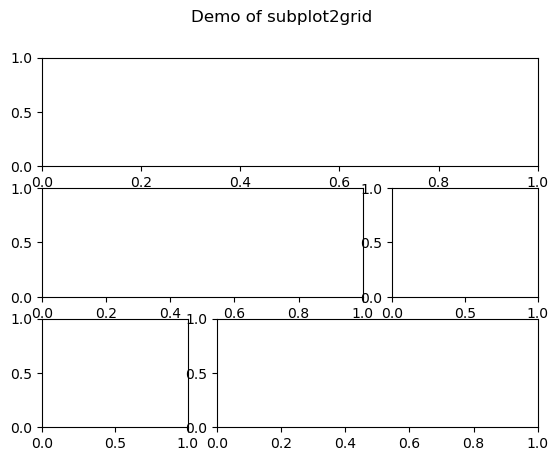

In [6]:
import matplotlib.pyplot as plt

plt.figure(0)
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2))
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=2)

# tidy up tick labels size
all_axes = plt.gcf().axes

for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)

plt.suptitle("Demo of subplot2grid")
plt.show()


## 定制化网格

最常用的网格定制化功能可以用matplotlib.pyplot.grid辅助函数完成。

为了能看到其交互效果，请在ipython中运行下面的代码。调用plt.grid()会在由IPython PyLab 环境开启的当前交互式会话中切换网格的可见性。

In [8]:
import matplotlib.pyplot as plt

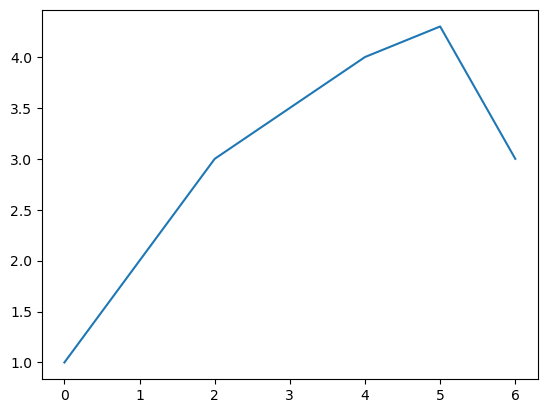

In [9]:
plt.plot([1,2,3,3.5,4,4.3,3])

现在我们可以在同一个图表中切换网格。

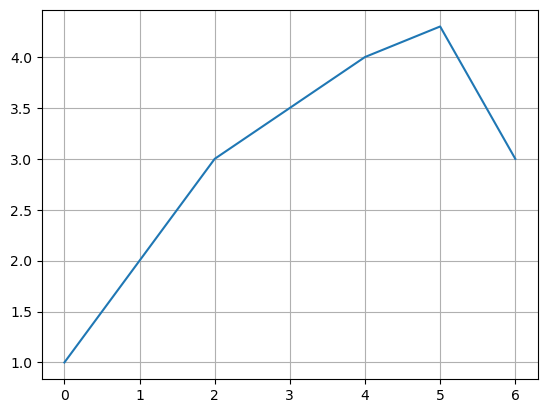

In [11]:
plt.plot([1,2,3,3.5,4,4.3,3])
plt.grid()

然后关闭网格。

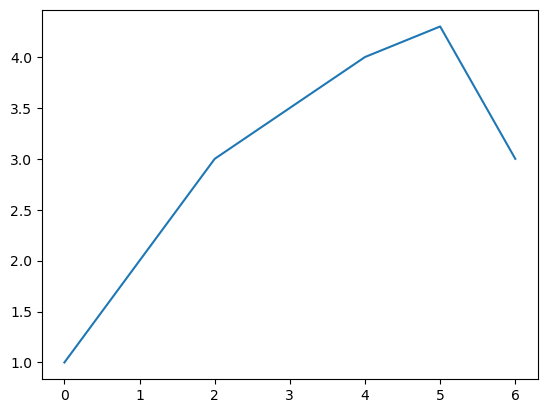

In [12]:
plt.plot([1,2,3,3.5,4,4.3,3])
plt.grid()
plt.grid()

除了打开或关闭网格之外，我们还能进一步定制化网格的外观。我们可以只通过主刻度或者次刻度，或者同时通过两个刻度来操作网格。
因此，函数参数which可以是'major'、'minor'或者'both'。与此类似，我们可以通过参数axis控制水平刻度和垂直刻度，参数值可以是'x'、'y'或者'both'。

所有其他属性通过kwargs参数传入，这些参数和matplotlib.lines.Line2D实例可以接受的标准属性集合相同，
比如color、linestyle和linewidth。这里有一个例子，代码如下。

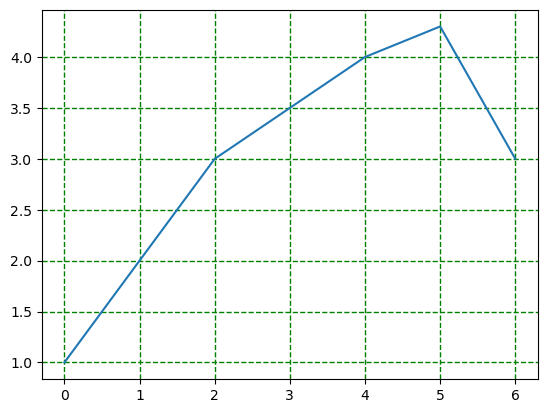

In [15]:
plt.plot([1,2,3,3.5,4,4.3,3])
plt.grid(color='g', linestyle='--', linewidth=1)

以上这些方式很有用，但是我们想要进行更多的定制化，就需要更深入地了解matplotlib，然后找到mpl_toolkits中的AxesGrid模块。
这个模块能让我们以一种更加简单且可管理的方式创建坐标轴网格。

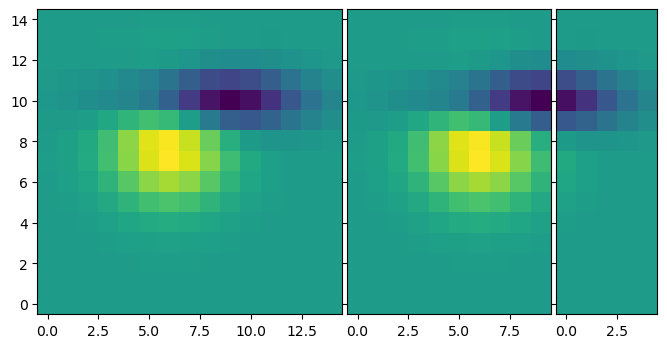

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data

def get_demo_image():
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    # z is a numpy array of 15x15
    Z = np.load(f)
    return Z, (-3, 4, -4, 3)

def get_grid(fig=None, layout=None, nrows_ncols=None):
    assert fig is not None
    assert layout is not None
    assert nrows_ncols is not None

    grid = ImageGrid(fig, layout, nrows_ncols=nrows_ncols,
                     axes_pad=0.05, label_mode="L")
    return grid

def load_images_to_grid(grid, Z, *images):
    min, max = Z.min(), Z.max()
    for i, image in enumerate(images):
        axes = grid[i]
        axes.imshow(image, origin="lower", vmin=min, vmax=max,
                    interpolation="nearest")

if __name__ == "__main__":
    fig = plt.figure(1, (8, 6))
    grid = get_grid(fig, 111, (1, 3))
    Z, extent = get_demo_image()

    # Slice image
    image1 = Z
    image2 = Z[:, :10]
    image3 = Z[:, 10:]

    load_images_to_grid(grid, Z, image1, image2, image3)
    plt.draw()
    plt.show()

## 创建等高线图

等高线图（contour plot）显示的是矩阵的等值线（isolines）。等值线是用数值相等的各点连成的曲线。
数值通过一个带有两个参数的函数[5]获得。

在下面的代码示例中，我们将进行以下操作。
1. 实现一个方法来模拟信号处理器。
2. 生成一些线性信号数据。
3. 把数据转换到合适的矩阵中供矩阵操作使用。
4. 绘制等高线。
6. 显示图形。

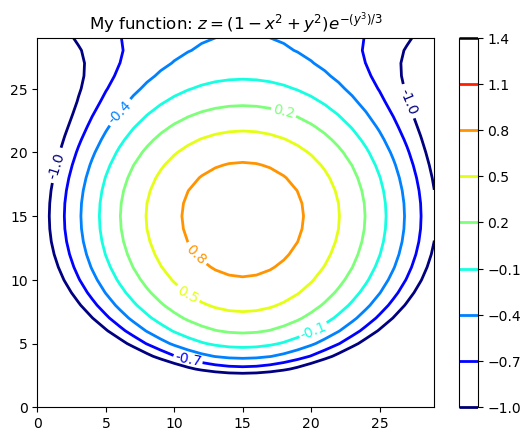

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def process_signals(x, y):
    return (1 - (x ** 2 + y ** 2)) * np.exp(-y ** 3 / 3)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

# Make grids of points
X, Y = np.meshgrid(x, y)

Z = process_signals(X, Y)

# Number of isolines
N = np.arange(-1, 1.5, 0.3)

# adding the Contour lines with labels
CS = plt.contour(Z, N, linewidths=2, cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

## 填充图表底层区域

本节从一个简单的例子开始——填充一个简单函数下面的区域。

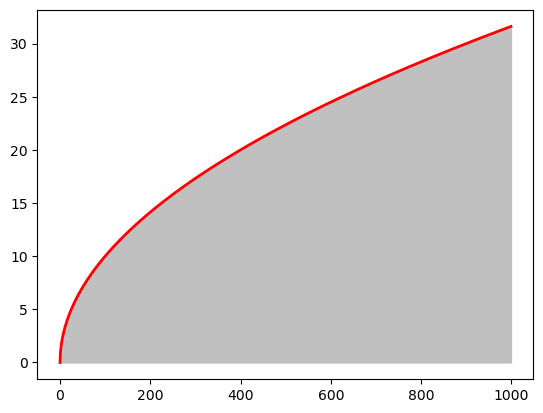

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

t = range(1000)
y = [sqrt(i) for i in t]
plt.plot(t, y, color='red', lw=2)

plt.fill_between(t, y, color='silver')
plt.show()

在这里，我们将演示另外一个技巧。它将为fill函数引入更多的条件，示例代码如下。

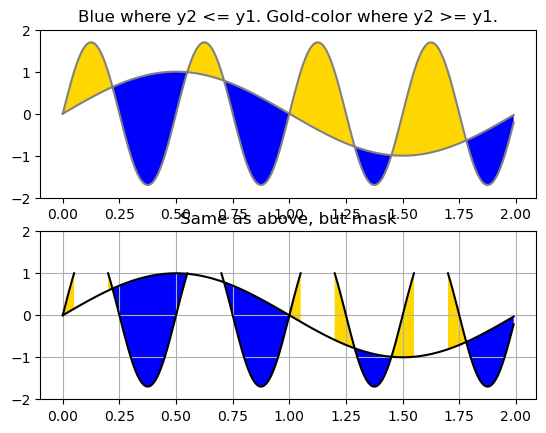

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi*x)
y2 = 1.7*np.sin(4*np.pi*x)

fig = plt.figure()
axes1 = fig.add_subplot(211)
axes1.plot(x, y1, x, y2, color='grey')
axes1.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue',
                   interpolate=True)
axes1.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold',
                   interpolate=True)
axes1.set_title('Blue where y2 <= y1. Gold-color where y2 >= y1.')
axes1.set_ylim(-2,2)

# Mask values in y2 with value greater than 1.0
y2 = np.ma.masked_greater(y2, 1.0)
axes2 = fig.add_subplot(212, sharex=axes1)
axes2.plot(x, y1, x, y2, color='black')
axes2.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes2.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes2.set_title('Same as above, but mask')
axes2.set_ylim(-2,2)
axes2.grid('on')

plt.show()                  

## 绘制极线图

为了在极坐标下显示数据，我们必须有合适的数据值。在极坐标系统中，点被描述为半径距离（通常表示为 $r$ ）和角度（通常表示为 $theta$）。
角度可以用弧度或者角度表示，但是在matplotlib使用角度表示。

和plot()函数十分相似的是，我们用polar()函数绘制极线图。
polar()函数接收两个相同长度的参数数组theta和r，它们分别用于角度数组和半径数组。
函数也接收其他和plot()函数相同的格式化参数。

我们需要告诉matplotlib坐标轴要在极坐标系统中。这通过向add_axes或add_subplot提供polar=True参数来完成。

此外，为了设置图表中的其他属性，如半径网格或者角度，我们需要使用matplotlib. pyplot.rgrids()来切换半径网格的显示或者设置标签。
同样，需要使用matplotlib.pyplot.thetagrid()来配置角度刻度和标签。

本节将演示如何绘制极线条，代码如下。

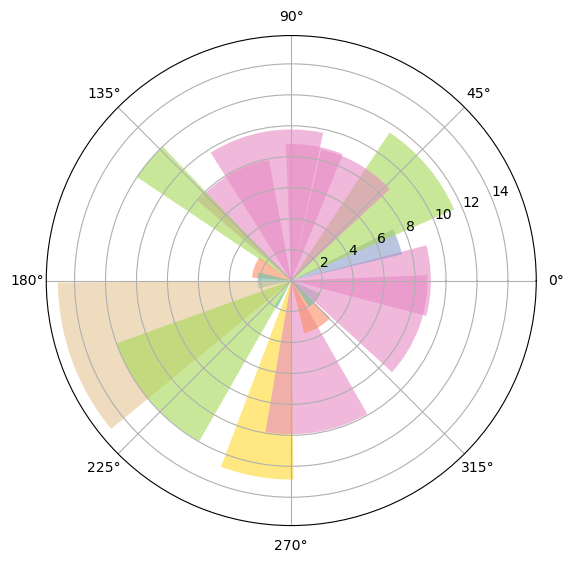

In [28]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

figsize = 7
colormap = lambda r: cm.Set2(r / 20.)
N = 18 # number of bars

fig = plt.figure(figsize=(figsize,figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)

theta = np.arange(0.0, 2 * np.pi, 2 * np.pi/N)
radii = 20 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(colormap(r))
    bar.set_alpha(0.6)

plt.show()